**Klerefontein Visibility Simulator**

This is an exmaple notebook to generate two-element interferometer visibilities for HIRAX. 
 

In [8]:
#Import libraries 

from lib import *
import h5py

* Read the given HDF5 file to reduce computation time since making the input image for the simulation is the time taking part. 

* I created a sky map for today of the shape **(timestamps, freq_chans, npix, npix)**. Generated at HIRAX location and observing frequency. And provided the CST simulated beam of the shape **(freq_chans, npix, npix)**.

* You can create your own sky map with your parameters using "createGSMsky" function provided in lib.py file. 


In [9]:
# Open the HDF5 file in read mode
with h5py.File('GSM_sky.h5', 'r') as f:
    # List all groups and datasets in the file
    print("Contents of the file:")
    print(list(f.keys()))

    # Access a specific dataset
    sky = f['GSM_sky'][:] 
    print("Sky data shape:", sky.shape)
    
with h5py.File('CST_beam.h5', 'r') as f:
    # List all groups and datasets in the file
    print("Contents of the file:")
    print(list(f.keys()))
    beam = f['cst_beam'][:]
    # Read the data
    #sky = dataset[:]
    
    print("Beam data shape:", beam.shape)
    

Contents of the file:
['GSM_sky']
Sky data shape: (120, 100, 151, 151)
Contents of the file:
['cst_beam']
Beam data shape: (100, 151, 151)


---
                The drifting sky


<img src="GSM_sky.gif" width="500" align="center">

---
Once the input sky image is ready, define simulation parameters. 

In [3]:
start_freq =  400 #in MHz
center_freq = 600 #in MHz
end_freq = 800 #in MHz

n_chan = 100 #no of channels 

chan_width = '1MHz'

latitude = -1*(30+43/60+16/3600) #in degrees

RA = '10h00m00.0s' #should be strings (sims not dependent on these)
DEC = '-31d00m00.0s' #should be strings

imsize = 151 #pixels
image_angular_resolution = '1deg'

---
Define antenna location in ENU (East North Up) coordinates [E,N.U]

For now, we will stick to two-element array. We can go for bigger array but the input sky image need to have more resolution (smaller then 1deg we created). 

For the given sample sky image, stick to baseline length of <20 metres. 

In [4]:
array_coord = np.array([[3,0,0],
                       [-3,0,0]])

Now, we proceed to main simulation step. 

* You can use 'simulate' function to simulate a snapshot visibility.

We will proceed with driftscan simulation (using simulate_drift) for 12hrs with 6min time sampling.

In [7]:
#set a directory name where files will be created and eventually deleted after operations
dirname='test' 

**Important note:**
The computation time mostly depends on ntime parameter. Slice through the 'sky' array like sky[10:15]
to reduce computation time. It roughly takes 7 seconds per time stamp.


In [ ]:
#wait for completion... 
V1 = simulate_drift(sky,beam,array_coord,latitude,start_freq,
                    chan_width,n_chan,RA,DEC,image_angular_resolution,
                    imsize,dirname)

In [11]:
#Check the shape of the output visibiity array (ntime,nchan,nbaseline)
V1.shape

(120, 100, 6)

---
Visualise the above array, or use the 'plot_waterfall' function to make a simple plot.


Plotting baseline index.. 0


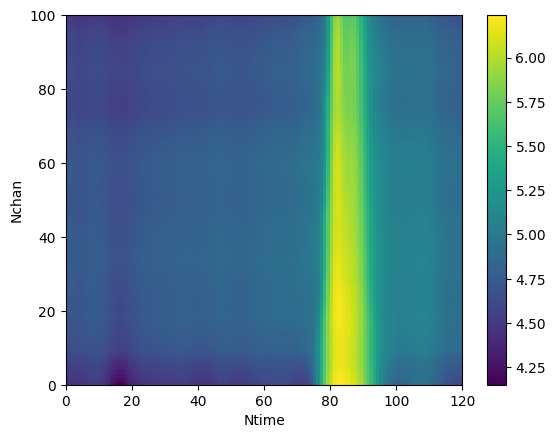

In [6]:
plot_waterfall(V1,(0,1),array_coord)